# Complete guide to barplot
- Pandas doc: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html#pandas.DataFrame.plot.bar
- Matplotlib doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar
- Seaborn doc: https://seaborn.pydata.org/generated/seaborn.barplot.html

# 1. Configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

---

# 2. Data

In [2]:
auto = pd.read_csv('auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [3]:
auto.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
387,18.0,6,250.0,88,3021,16.5,73,US,ford maverick,red,25.351225,o
388,27.0,4,151.0,90,2950,17.3,82,US,chevrolet camaro,blue,24.173611,o
389,29.5,4,98.0,68,2135,16.6,78,Asia,honda accord lx,blue,12.661736,x
390,17.5,6,250.0,110,3520,16.4,77,US,chevrolet concours,red,34.417778,o
391,25.1,4,140.0,88,2720,15.4,78,US,ford fairmont (man),blue,20.551111,o


In [4]:
auto_grp_origin = auto.groupby('origin').sum()
auto_grp_origin

,mpg,cyl,displ,hp,weight,accel,yr,size
origin,,,,,,,,
Asia,2405.6,324,8114.0,6307,175477,1277.6,6118,1104.962336
Europe,1877.0,283,7455.0,5478,165476,1142.0,5146,1163.574994
US,4908.2,1538,60640.5,29167,826260,3672.6,18520,8169.172361


---

# 3. Pandas barplot standard parameters
```
DataFrame.plot.bar(x=None, y=None, **kwds)

DataFrame.plot.barh(x=None, y=None, **kwds)

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
```

## a) Barplot using original dataframe

Text(0.5,1,'Barplot')

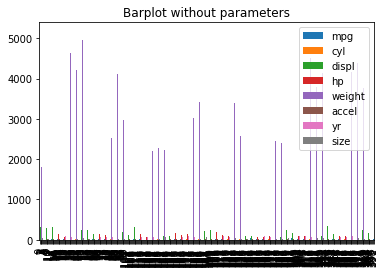

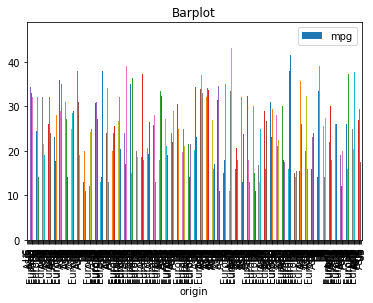

In [5]:
auto.plot.bar()
plt.title('Barplot without parameters')

auto.plot.bar(x='origin', y='mpg')
plt.title("Barplot")

## b) Multiple barplot

Text(0.5,1,'Multiple barplot')

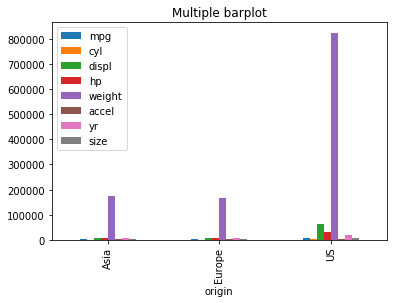

In [6]:
auto_grp_origin.plot.bar()
plt.title("Multiple barplot")

## c) Stacked barplot

Text(0.5,1,'Stacked barplot')

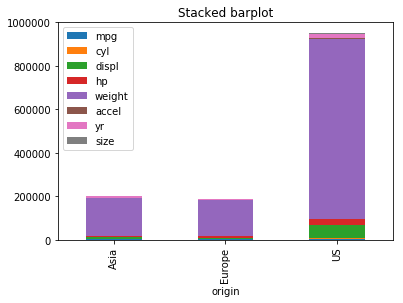

In [7]:
auto_grp_origin.plot.bar(stacked=True)
plt.title("Stacked barplot")

## d) Horizontally stacked barplot

Text(0.5,1,'Horizontally stacked barplot')

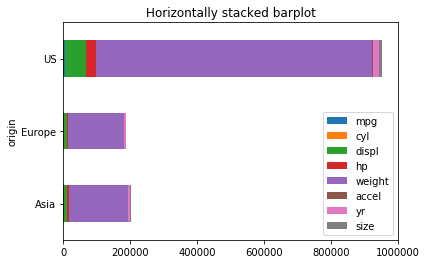

In [8]:
auto_grp_origin.plot.barh(stacked=True)
plt.title("Horizontally stacked barplot")

---

# 4. Matplotlib standard parameters
```
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, align='center', color, edgecolor, linewidth=None, tick_label=None, xerr=None, yerr=None, ecolor=None, capsize, error_kw, log=False, orientation)
```

Text(0.5,1,'Barplot x argument alignment')

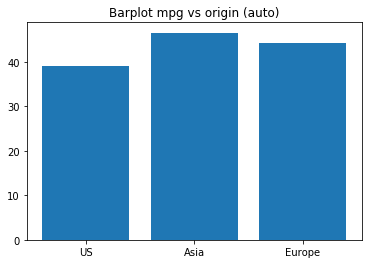

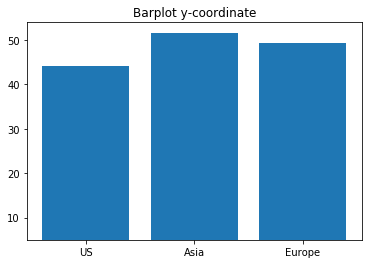

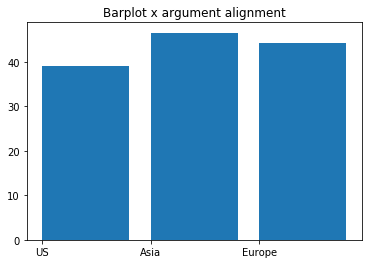

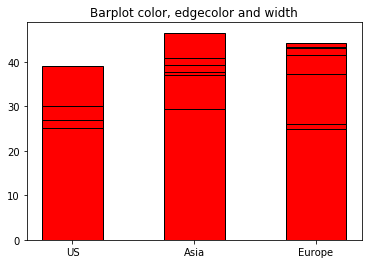

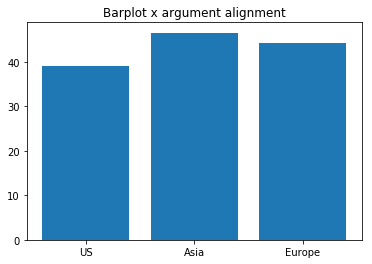

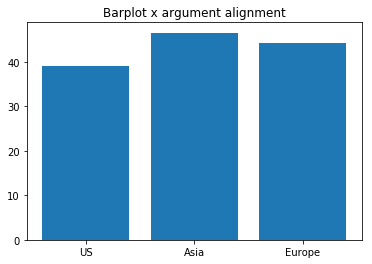

In [9]:
# Default
plt.bar(x=auto['origin'], height=auto['mpg'])
plt.title('Barplot mpg vs origin (auto)')

# Bottom y-coordinate
plt.figure()
plt.bar(x=auto['origin'], height=auto['mpg'], bottom=5)
plt.title('Barplot y-coordinate')

# Align x argument
plt.figure()
plt.bar(x=auto['origin'], height=auto['mpg'], align='edge')
plt.title('Barplot x argument alignment')

# Color & Edgecolor & Width
plt.figure()
plt.bar(x=auto['origin'], height=auto['mpg'], width=0.5, color='red', edgecolor='black')
plt.title('Barplot color, edgecolor and width')

# Align x argument
plt.figure()
plt.bar(x=auto['origin'], height=auto['mpg'], linewidth=0)
plt.title('Barplot x argument alignment')

# Align x argument
plt.figure()
plt.bar(x=auto['origin'], height=auto['mpg'], ecolor='black')
plt.title('Barplot x argument alignment')

Text(0.5,1,'Horizontal barplot origin vs mpg (auto)')

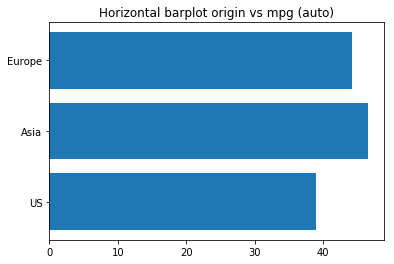

In [10]:
plt.barh(y=auto['origin'], width=auto['mpg'])
plt.title('Horizontal barplot origin vs mpg (auto)')

---

# 5. Seaborn standard parameters
```
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
```

## a) auto dataframe

Text(0.5,1,'Horizontal multiple barplot group by color (auto)')

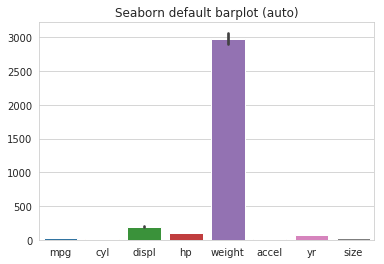

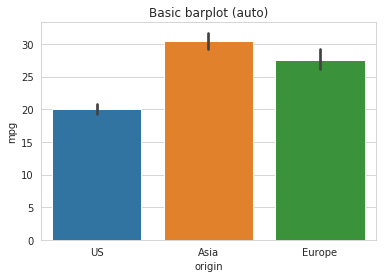

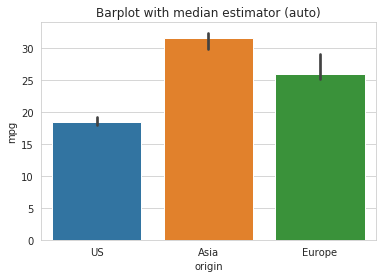

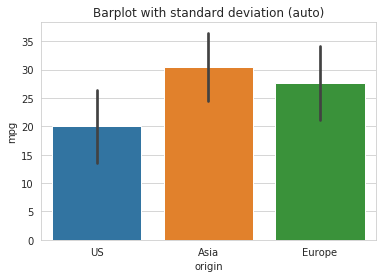

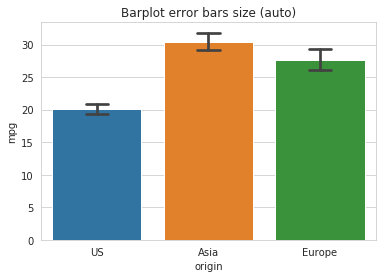

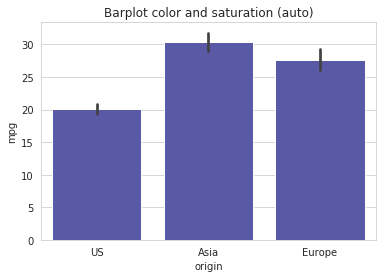

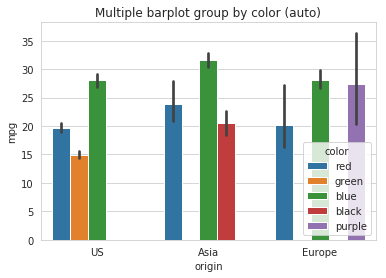

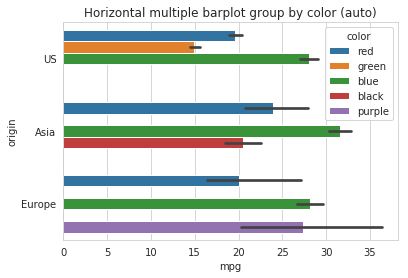

In [11]:
# Default
sns.set_style('whitegrid')
sns.barplot(data=auto)
plt.title('Seaborn default barplot (auto)')

# Basic
plt.figure()
sns.barplot(x='origin', y='mpg', data=auto)
plt.title('Basic barplot (auto)')

# Estimator
plt.figure()
sns.barplot(x='origin', y='mpg', data=auto, estimator=np.median)
plt.title('Barplot with median estimator (auto)')

# Show std instead of confidence interval
plt.figure()
sns.barplot(x='origin', y='mpg', data=auto, ci='sd')
plt.title('Barplot with standard deviation (auto)')

# Error bars size
plt.figure()
sns.barplot(x='origin', y='mpg', data=auto, capsize=0.2)
plt.title('Barplot error bars size (auto)')

# Color & saturation
plt.figure()
sns.barplot(x='origin', y='mpg', data=auto, color='blue', saturation=0.3)
plt.title('Barplot color and saturation (auto)')

# Multiple barplot
plt.figure()
sns.barplot(x='origin', y='mpg', hue='color', data=auto)
plt.title('Multiple barplot group by color (auto)')

# Horizontal barplot
plt.figure()
sns.barplot(x='mpg', y='origin', hue='color', data=auto)
plt.title('Horizontal multiple barplot group by color (auto)')

## b) auto_grp_origin dataframe

Text(0.5,1,'Barplot color and saturation (auto)')

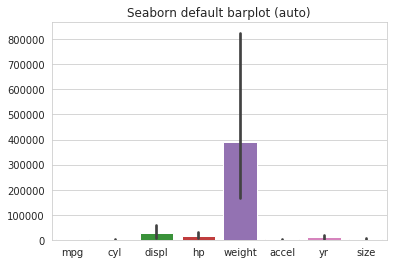

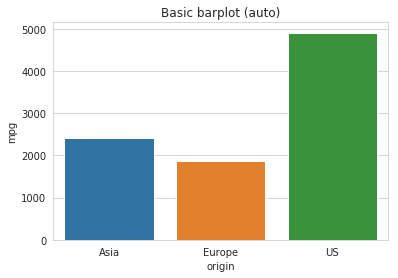

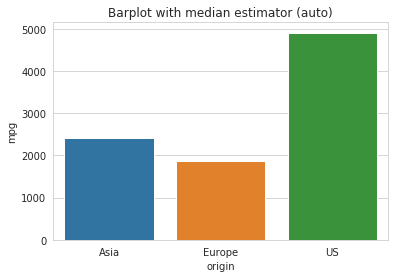

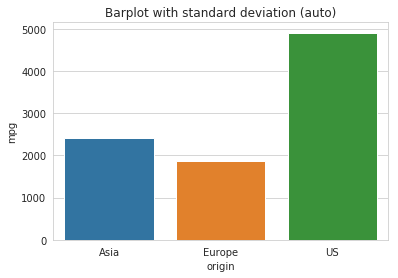

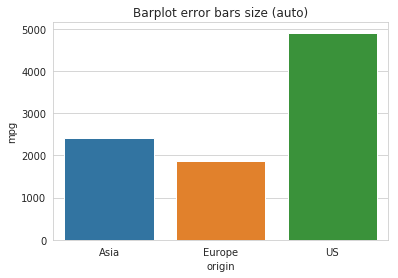

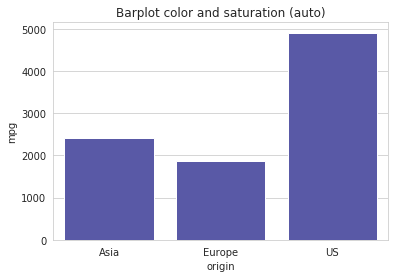

In [12]:
# Default
sns.set_style('whitegrid')
sns.barplot(data=auto_grp_origin)
plt.title('Seaborn default barplot (auto)')

# Basic
plt.figure()
sns.barplot(x=auto_grp_origin.index, y='mpg', data=auto_grp_origin)
plt.title('Basic barplot (auto)')

# Estimator
plt.figure()
sns.barplot(x=auto_grp_origin.index, y='mpg', data=auto_grp_origin, estimator=np.median)
plt.title('Barplot with median estimator (auto)')

# Show std instead of confidence interval
plt.figure()
sns.barplot(x=auto_grp_origin.index, y='mpg', data=auto_grp_origin, ci='sd')
plt.title('Barplot with standard deviation (auto)')

# Error bars size
plt.figure()
sns.barplot(x=auto_grp_origin.index, y='mpg', data=auto_grp_origin, capsize=0.2)
plt.title('Barplot error bars size (auto)')

# Color & saturation
plt.figure()
sns.barplot(x=auto_grp_origin.index, y='mpg', data=auto_grp_origin, color='blue', saturation=0.3)
plt.title('Barplot color and saturation (auto)')